# Reinforcement Learning
[Usamos Taxi-v2 de gymai](https://gym.openai.com/envs/Taxi-v2/)

In [87]:
#!pip install gym
import gym
env = gym.make("Taxi-v3").env

Dibujamos la posición incial del Taxi

In [88]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Numero de Acciones que puedes tener
1. Adelante
2. Atras
3. Derecha
4. Izquierda
5. Recoge pasajero
6. Deja pasajero

In [89]:
env.action_space

Discrete(6)

In [90]:
env.observation_space

Discrete(500)

In [91]:
for i in env.decode(499):
    print(i)

4
4
4
3


In [92]:
action = env.action_space.sample()
state, reward, done, info = env.step(action)
print(state, reward, done, info)

251 -10 False {'prob': 1.0}


In [93]:
for i in env.decode(state):
    print(i)

2
2
2
3


In [94]:
action
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


In [95]:
from IPython.display import clear_output
env.reset()
env.s = 328
epochs = 0
penalties, reward = 0, 0
frames = []
done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if reward == -10:
        penalties +=1
    clear_output(wait = True)    
    env.render()
    epochs += 1
print(epochs, penalties)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
61 21


In [96]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [97]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [104]:
import random
alpha = 0.1
gamma = 0.6
epsilon = 0.5

for i in range(1,10000):
    state = env.reset()
    epochs, penalties, rewards = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) <= epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        if reward == -10:
            penalties += 1
        state = next_state
        epochs += 1 
    
print(epochs, penalties)
    

18 1


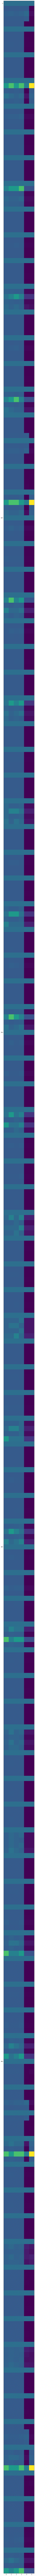

In [105]:
import pylab as plt
dim = (5, 500)
fig, ax = plt.subplots(figsize= dim)
plt.imshow(q_table)
plt.show()

In [107]:
state = env.reset()
epochs, penalties, reward = 0, 0, 0
done = False

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    if reward == -10:
        penalties += 1
    epochs += 1
    clear_output(wait = True)
    env.render()
print(epochs, penalties)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
9 0
